# Load the Data

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

# Show certain columns

In [6]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [9]:
df[['    DATE', '   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Statistics and Filtering

In [12]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

np.float64(6.360787526128467)

In [13]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

np.float64(26.2)

In [14]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

np.float64(-28.8)

<Axes: >

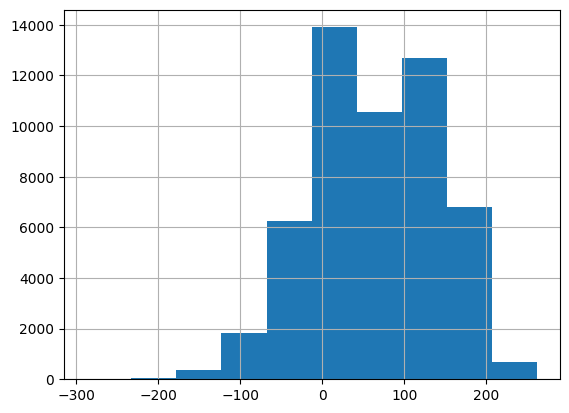

In [15]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

In [16]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

# accesing through co-ordinates

In [17]:
df.loc[2, '   TG']

np.int64(31)

# creating new column out of existing column

In [25]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG'] == -9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,1,35381,1860-01-01,21,0,21.0,21.0
1,1,35381,1860-01-02,46,0,46.0,46.0
2,1,35381,1860-01-03,31,0,31.0,31.0
3,1,35381,1860-01-04,37,0,37.0,37.0
4,1,35381,1860-01-05,31,0,31.0,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


In [26]:
df["TG"] = df['TG0'] / 10

In [27]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


In [29]:
df["Farenhiet"] = df["TG"] * (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0,Farenhiet
0,1,35381,1860-01-01,21,0,2.1,21.0,35.78
1,1,35381,1860-01-02,46,0,4.6,46.0,40.28
2,1,35381,1860-01-03,31,0,3.1,31.0,37.58
3,1,35381,1860-01-04,37,0,3.7,37.0,38.66
4,1,35381,1860-01-05,31,0,3.1,31.0,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: xlabel='    DATE'>

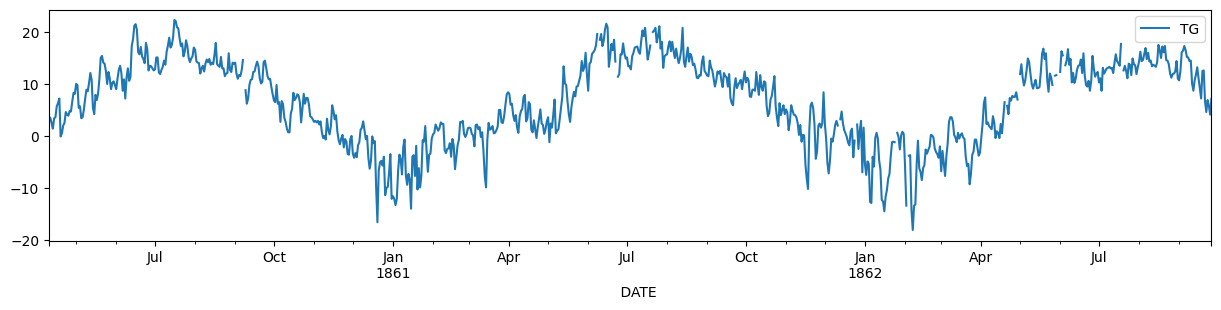

In [31]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(15, 3))